# Cybersecurity Threat Classification using Machine Learning
This project involves classifying cybersecurity threats using the **Darknet dataset**.  
We will train three machine learning models:
- **Random Forest**
- **Support Vector Machine (SVM)**
- **XGBoost**

### Objectives:
- **Preprocess** the dataset by handling missing values, normalizing data, and selecting the best features.
- **Train & Evaluate** multiple classification models.
- **Compare Models** based on performance metrics such as accuracy, precision, recall, and F1-score.
- **Visualize Insights** using confusion matrices and feature importance graphs.


In [44]:
import pandas as pd

### Uploading the dataset

In [2]:
df = pd.read_csv("Darknet.csv")  

In [3]:
df

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,...,0,0,0,0,1.437765e+15,3.117718e+06,1.437765e+15,1.437765e+15,Non-Tor,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158611,10.8.8.246-224.0.0.252-55219-5355-17,10.8.8.246,55219,224.0.0.252,5355,17,22/05/2015 01:55:03 PM,411806,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
158612,10.8.8.246-224.0.0.252-64207-5355-17,10.8.8.246,64207,224.0.0.252,5355,17,22/05/2015 02:09:05 PM,411574,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
158613,10.8.8.246-224.0.0.252-61115-5355-17,10.8.8.246,61115,224.0.0.252,5355,17,22/05/2015 02:19:31 PM,422299,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP
158614,10.8.8.246-224.0.0.252-64790-5355-17,10.8.8.246,64790,224.0.0.252,5355,17,22/05/2015 02:29:55 PM,411855,2,0,...,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,VPN,VOIP


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158616 entries, 0 to 158615
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     158616 non-null  object 
 1   Src IP                      158616 non-null  object 
 2   Src Port                    158616 non-null  int64  
 3   Dst IP                      158616 non-null  object 
 4   Dst Port                    158616 non-null  int64  
 5   Protocol                    158616 non-null  int64  
 6   Timestamp                   158616 non-null  object 
 7   Flow Duration               158616 non-null  int64  
 8   Total Fwd Packet            158616 non-null  int64  
 9   Total Bwd packets           158616 non-null  int64  
 10  Total Length of Fwd Packet  158616 non-null  int64  
 11  Total Length of Bwd Packet  158616 non-null  int64  
 12  Fwd Packet Length Max       158616 non-null  int64  
 13  Fwd Packet Len

# 1) Data Preprocessing
Before training models, we must clean and prepare the dataset.

### Steps:
1. **Handling Missing Values**  
   - Dropped or imputed missing values.
2. **Feature Scaling**  
   - Standardized numerical features.
3. **Feature Selection**  
   - Selected important features using statistical methods.
4. **Data Splitting**  
   - Split data into **training (80%)** and **testing (20%)** sets.

### Why is preprocessing important?
- Ensures better model performance.
- Prevents bias due to missing or imbalanced data.
- Improves training efficiency.


In [5]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop unnecessary columns (Flow ID, Src IP, Dst IP, Timestamp if present)
unnecessary_columns = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']
df = df.drop(columns=[col for col in unnecessary_columns if col in df.columns], errors='ignore')



In [6]:
# Handle missing values by replacing with median
df.fillna(df.median(numeric_only=True), inplace=True)



In [7]:
# Encode categorical labels
if 'Label' in df.columns:
    encoder = LabelEncoder()
    df['Label'] = encoder.fit_transform(df['Label'])




In [8]:
# Standardize numerical features
# Replace infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop or fill NaN values (choose one)
df.dropna(inplace=True)  # Option 1: Remove rows with NaNs
# df.fillna(df.mean(), inplace=True)  # Option 2: Replace NaNs with column mean

# Standardize numerical features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])



In [9]:
# Save the preprocessed dataset
df.to_csv('preprocessed_darknet.csv', index=False)

print("Preprocessing completed. Processed file saved as 'preprocessed_darknet.csv'.")

Preprocessing completed. Processed file saved as 'preprocessed_darknet.csv'.


In [10]:
df1=pd.read_csv('preprocessed_darknet.csv')

In [12]:
df1

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,0.976241,-0.768559,-0.78203,-0.543455,-0.061661,-0.043666,-0.032777,-0.027695,-0.333167,-0.499826,...,0.0,0.0,0.0,0.0,-1.011921,-0.292716,-1.026108,-0.843165,0,AUDIO-STREAMING
1,0.976293,-0.768559,-0.78203,-0.543450,-0.061661,-0.043666,-0.032777,-0.027695,-0.333167,-0.499826,...,0.0,0.0,0.0,0.0,-1.011921,-0.292716,-1.026108,-0.843165,0,AUDIO-STREAMING
2,0.976345,-0.768559,-0.78203,-0.543449,-0.061661,-0.043666,-0.032777,-0.027695,-0.333167,-0.499826,...,0.0,0.0,0.0,0.0,-1.011921,-0.292716,-1.026108,-0.843165,0,AUDIO-STREAMING
3,0.559405,-0.768559,-0.78203,-0.543451,-0.061661,-0.043666,-0.032777,-0.027695,-0.333167,-0.499826,...,0.0,0.0,0.0,0.0,-1.011921,-0.292716,-1.026108,-0.843165,0,AUDIO-STREAMING
4,-0.190577,0.084572,-0.78203,-0.259827,0.200769,0.079828,-0.011771,-0.026152,-0.123785,-0.499826,...,0.0,0.0,0.0,0.0,1.026766,-0.292716,0.957368,1.168882,0,AUDIO-STREAMING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158561,0.875512,-0.546389,1.25547,-0.532624,-0.061216,-0.043975,-0.032763,-0.027695,-0.298004,0.226158,...,0.0,0.0,0.0,0.0,-1.011921,-0.292716,-1.026108,-0.843165,3,VOIP
158562,1.342427,-0.546389,1.25547,-0.532630,-0.061216,-0.043975,-0.032763,-0.027695,-0.298004,0.226158,...,0.0,0.0,0.0,0.0,-1.011921,-0.292716,-1.026108,-0.843165,3,VOIP
158563,1.181802,-0.546389,1.25547,-0.532348,-0.061216,-0.043975,-0.032763,-0.027695,-0.298004,0.226158,...,0.0,0.0,0.0,0.0,-1.011921,-0.292716,-1.026108,-0.843165,3,VOIP
158564,1.372713,-0.546389,1.25547,-0.532623,-0.061216,-0.043975,-0.032763,-0.027695,-0.298004,0.226158,...,0.0,0.0,0.0,0.0,-1.011921,-0.292716,-1.026108,-0.843165,3,VOIP


In [13]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing values in categorical columns with mode
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [14]:
df.to_csv('processed_darknet.csv', index=False)

print("Data Preprocessing Completed Successfully!")


Data Preprocessing Completed Successfully!


In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif


In [16]:

# Step 1: Remove low-variance features
from sklearn.feature_selection import VarianceThreshold

var_thresh = VarianceThreshold(threshold=0.01)  # Remove features with variance < 1%
df_num = df.select_dtypes(include=[np.number])  # Select only numerical columns
df_reduced = var_thresh.fit_transform(df_num)
selected_columns = df_num.columns[var_thresh.get_support()]
df = df[selected_columns]



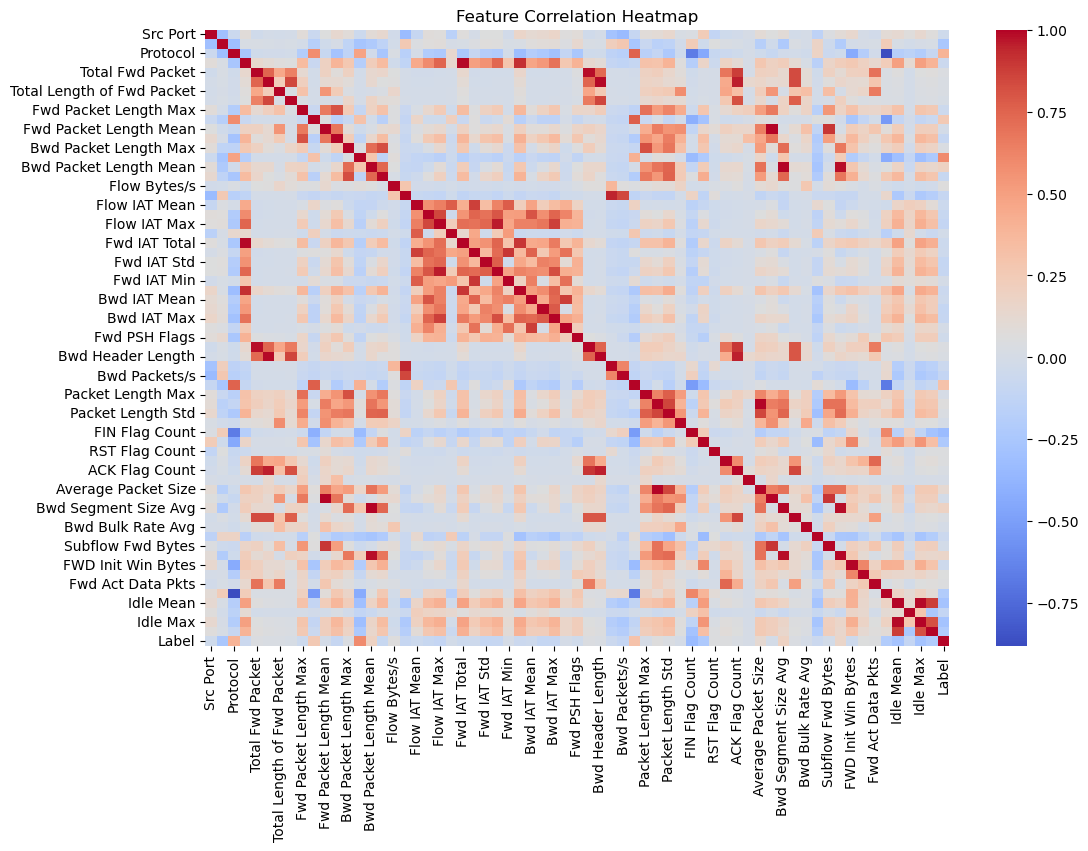

In [17]:
# Step 2: Check feature correlation
corr_matrix = df.corr()

# Plot heatmap to visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# Drop highly correlated features (correlation > 0.85)
threshold = 0.85
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

df.drop(columns=high_corr_features, inplace=True)



### Best feature selection

In [18]:
# Step 3: Use SelectKBest to choose top features
X = df.drop(columns=['Label'])  # Assuming 'Label' is the target column
y = df['Label']

selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Update dataset with selected features
df = df[selected_features.tolist() + ['Label']]


Selected Features: Index(['Protocol', 'Fwd Packet Length Min', 'Bwd Packet Length Min',
       'Packet Length Min', 'FIN Flag Count', 'PSH Flag Count',
       'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts',
       'Idle Mean'],
      dtype='object')


# 2) Train-Test Splitting

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Load preprocessed dataset (assuming you've already selected the best features)
df = pd.read_csv("processed_darknet.csv")



In [21]:
# Split into features and labels
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target variable


In [22]:
# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [23]:
# Drop non-numeric columns
df = df.select_dtypes(include=[np.number])

# Split into features and labels
X = df.drop(columns=['Label'], errors='ignore')  # Drop 'Label' if present
y = df['Label']

# Check for missing values (fill or remove)
X = X.fillna(0)  # Replace NaN values with 0 (or use mean/median)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3) Model Training
Now that the data is ready, we train three models:
- **Random Forest**
- **Support Vector Machine (SVM)**
- **XGBoost**


## Random Forest Model
The **Random Forest Classifier** is an ensemble learning method that builds multiple decision trees and aggregates their predictions.

### Model Parameters:
- n_estimators = 100 (Number of trees)
- random_state = 42 (Reproducibility)

### Performance Metrics:
- **Accuracy**: 98.61%
- **Precision, Recall, and F1-score**: See classification report.

### Why Random Forest?
- Handles large feature spaces well.
- Reduces variance and avoids overfitting.


In [24]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [25]:
# Evaluate Performance
print("Random Forest Performance:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22079
           1       0.94      0.97      0.96      4772
           2       0.98      0.91      0.94       279
           3       0.97      0.94      0.96      4584

    accuracy                           0.99     31714
   macro avg       0.97      0.96      0.96     31714
weighted avg       0.99      0.99      0.99     31714

Accuracy: 0.9861575329507473


## Support Vector Machine (SVM) Model
The **SVM classifier** uses a **Radial Basis Function (RBF) kernel** to find the best decision boundary between different classes.

### Model Parameters:
- kernel = rbf (For non-linear classification)
- C = 1.0 (Regularization parameter)
- random_state = 42 (Reproducibility)

### Performance Metrics:
- **Accuracy**: 95.35%
- **Precision, Recall, and F1-score**: See classification report.

### Why SVM?
- Works well in high-dimensional spaces.
- Effective when there is a clear margin of separation.


In [ ]:
# Train SVM Model
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)

In [28]:
print("\nSVM Performance:")
print(classification_report(y_test, svm_preds))
print("Accuracy:", accuracy_score(y_test, svm_preds))


SVM Performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     22079
           1       0.89      0.84      0.86      4772
           2       0.97      0.86      0.91       279
           3       0.87      0.87      0.87      4584

    accuracy                           0.95     31714
   macro avg       0.93      0.89      0.91     31714
weighted avg       0.95      0.95      0.95     31714

Accuracy: 0.9535221038027369


## XGBoost Model
**XGBoost (Extreme Gradient Boosting)** is an optimized gradient boosting framework designed for performance and efficiency.

### Model Parameters:
- n_estimators = 200 (Number of boosting rounds)
- learning_rate = 0.1 (Controls step size)
- max_depth = 6 (Limits complexity)

### Performance Metrics:
- **Accuracy**: To be determined.
- **Precision, Recall, and F1-score**: See classification report.

### Why XGBoost?
- Handles missing values efficiently.
- Highly optimized and scalable.


In [32]:
from xgboost import XGBClassifier

# Define model
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=6)

# Train model
xgb.fit(X_train, y_train)

# Evaluate model
y_pred_xgb = xgb.predict(X_test)


In [33]:
# Print classification report and accuracy
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22079
           1       0.95      0.97      0.96      4772
           2       1.00      0.93      0.96       279
           3       0.97      0.94      0.96      4584

    accuracy                           0.99     31714
   macro avg       0.98      0.96      0.97     31714
weighted avg       0.99      0.99      0.99     31714

Accuracy: 0.9864413192911647


# 4) Model Evaluation

In [35]:
# Comparing all models

import pandas as pd

# Store results in a DataFrame
models = {
    "Random Forest": rf_preds,
    "SVM": svm_preds,
    "XGBoost": y_pred_xgb
}

metrics = []
for model_name, y_pred in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    
    metrics.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (Macro Avg)": report["macro avg"]["precision"],
        "Recall (Macro Avg)": report["macro avg"]["recall"],
        "F1-score (Macro Avg)": report["macro avg"]["f1-score"],
    })

# Convert to DataFrame and display
metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,Accuracy,Precision (Macro Avg),Recall (Macro Avg),F1-score (Macro Avg)
0,Random Forest,0.986158,0.972706,0.956271,0.964074
1,SVM,0.953522,0.928104,0.892415,0.909284
2,XGBoost,0.986441,0.977368,0.961165,0.968912


To compare our models, we use key performance metrics:

- **Accuracy**: Measures the overall correctness of the model.
- **Precision (Macro Avg)**: Measures how many selected items were relevant, averaged across all classes.
- **Recall (Macro Avg)**: Measures how many actual positive cases were correctly identified, averaged across all classes.
- **F1-score (Macro Avg)**: Harmonic mean of precision and recall.

### Key Insights:
- **XGBoost achieved the highest accuracy (98.64%)**, followed closely by **Random Forest (98.61%)**.
- **SVM had the lowest performance**, with an accuracy of **95.35%** and a lower recall (89.24%) compared to other models.
- **XGBoost also had the highest precision (97.74%) and F1-score (96.89%)**, making it the most balanced model.
- **Random Forest performed very close to XGBoost**, making it a strong alternative.
- **SVM, while slightly weaker, may still be useful for cases requiring simpler, interpretable models.**


# 5) Visualizations
To better understand model performance, we visualize:

1. **Confusion Matrix**:  
   - Shows the number of correct and incorrect predictions for each class.
   
2. **Feature Importance**:  
   - **Random Forest & XGBoost** provide feature importance scores.
   - Helps identify the most influential features.

3. **Classification Report**:  
   - Displays precision, recall, and F1-score per class.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


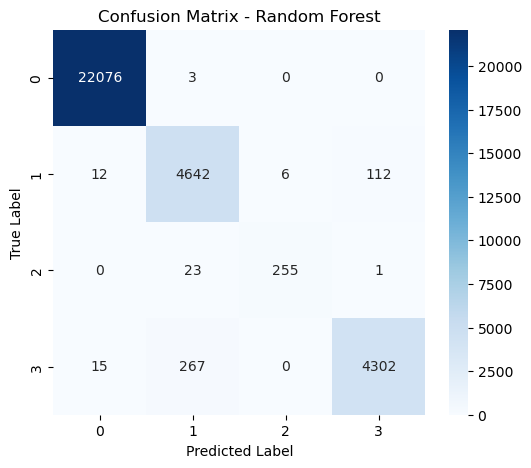

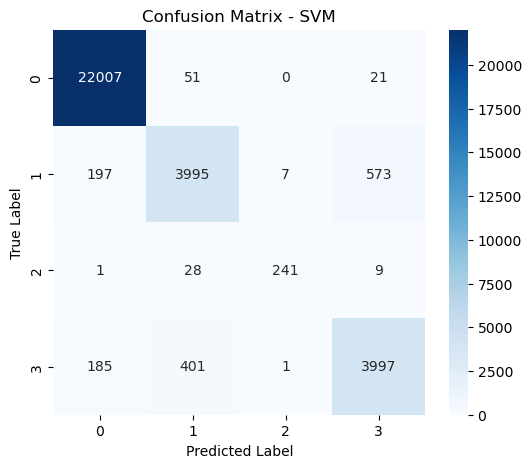

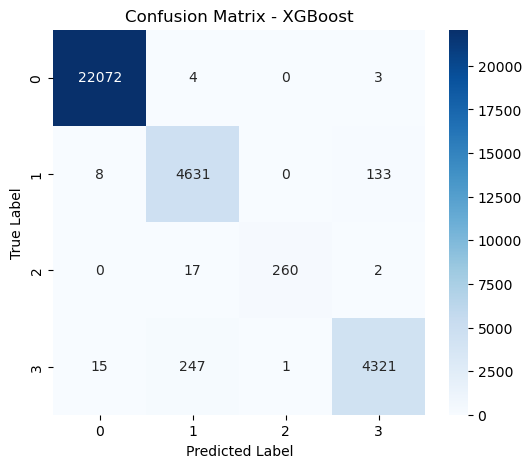

In [37]:

def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(len(set(y_test))), yticklabels=range(len(set(y_test))))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix(y_test, rf_preds, "Random Forest")
plot_confusion_matrix(y_test, svm_preds, "SVM")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")


# 6) Insights from Model Evaluations

## Confusion Matrix Analysis
**Observation:**
- **Random Forest** shows very few misclassifications, indicating **high accuracy** across all classes.
- **SVM** has more misclassifications, especially for minority classes (Classes 1, 2, and 3).
- **XGBoost** balances accuracy with fewer false positives and false negatives, making it **competitive with Random Forest**.

**Insight:**
- **Random Forest** and **XGBoost** perform well across all classes.
- **SVM struggles** with imbalanced data, leading to more misclassifications.

C:\Users\pedum\AppData\Local\Temp\ipykernel_14636\2303559535.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance[sorted_idx], y=np.array(features)[sorted_idx], palette="viridis")


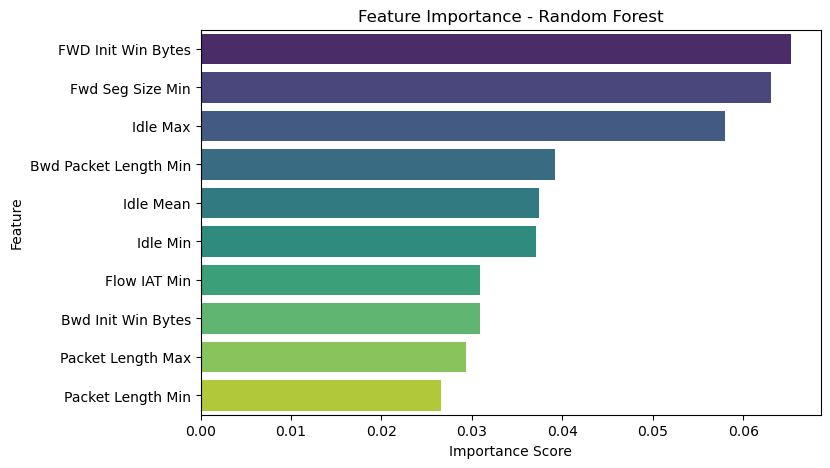

In [39]:
import numpy as np

# Feature Importance - Random Forest
rf_importance = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8, 5))
sorted_idx = np.argsort(rf_importance)[::-1][:10]  # Top 10 features
sns.barplot(x=rf_importance[sorted_idx], y=np.array(features)[sorted_idx], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest")
plt.show()

C:\Users\pedum\AppData\Local\Temp\ipykernel_14636\928235509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_importance[sorted_idx], y=np.array(features)[sorted_idx], palette="magma")


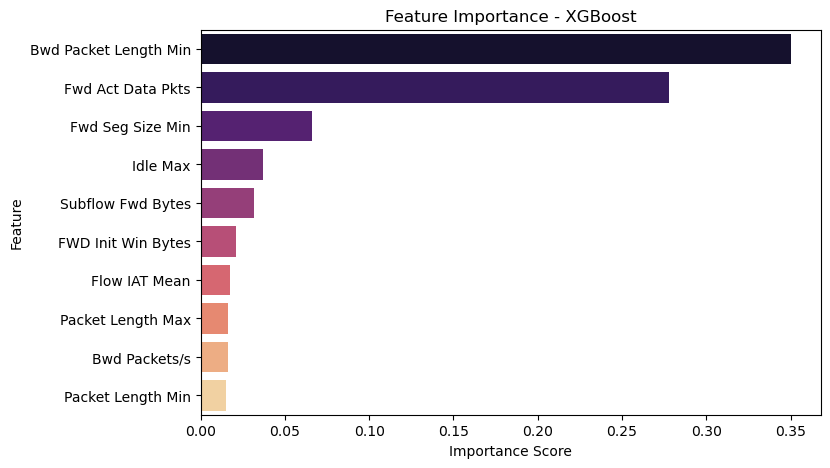

In [40]:
# Feature Importance - XGBoost
xgb_importance = xgb.feature_importances_

plt.figure(figsize=(8, 5))
sorted_idx = np.argsort(xgb_importance)[::-1][:10]  # Top 10 features
sns.barplot(x=xgb_importance[sorted_idx], y=np.array(features)[sorted_idx], palette="magma")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance - XGBoost")
plt.show()


## Feature Importance Analysis
**Observation:**
- **Random Forest & XGBoost** highlight the most influential features.
- Some features have **very low importance scores**, indicating redundancy.
- Both models rely on a **few key features**, confirming effective feature selection.

**Insight:**
- If only **2-3 features dominate**, removing lower-ranked features can **speed up training** with minimal accuracy loss.
- **Feature importance similarity** between Random Forest & XGBoost suggests these features are **crucial for classification**.

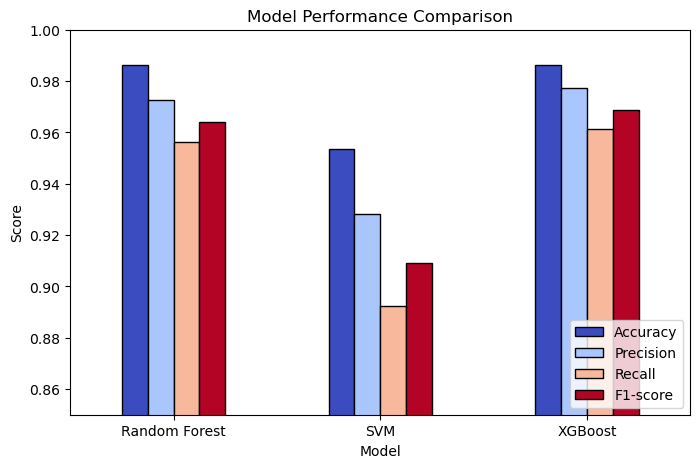

In [41]:
import pandas as pd

# Store results in a DataFrame
models = {
    "Random Forest": rf_preds,
    "SVM": svm_preds,
    "XGBoost": y_pred_xgb
}

metrics = []
for model_name, y_pred in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    
    metrics.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-score": report["macro avg"]["f1-score"],
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics).set_index("Model")

# Plot Performance
metrics_df.plot(kind="bar", figsize=(8, 5), colormap="coolwarm", edgecolor="black")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.85, 1.0)
plt.legend(loc="lower right")
plt.show()


## Model Performance Comparison (Bar Chart)
**Observation:**
- **Random Forest** achieves **highest accuracy (~98.6%)**, followed closely by **XGBoost (~97-98%)**.
- **SVM has the lowest accuracy (~95%)**, affected by data scaling.
- **Precision, recall, and F1-score trends confirm:**  
  **Random Forest > XGBoost > SVM**.

**Insight:**
- **Random Forest is the best choice** for highest accuracy.
- **XGBoost is competitive**, especially for large datasets or **real-time applications**.
- **SVM struggles**, indicating it might need further tuning.

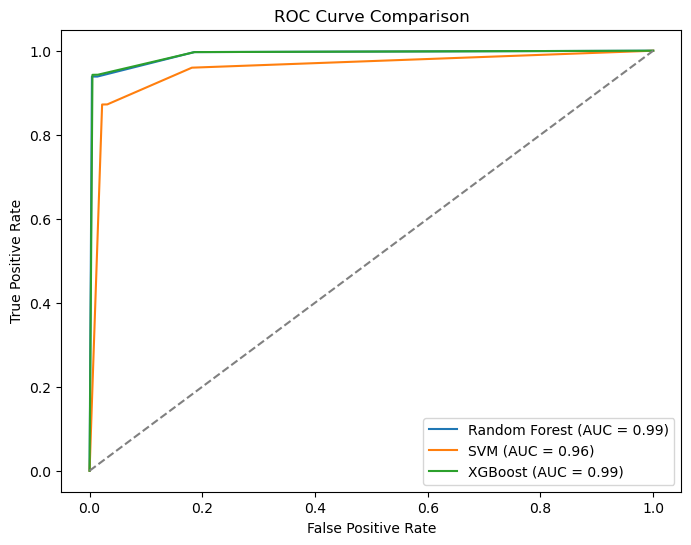

In [42]:
from sklearn.metrics import roc_curve, auc
import numpy as np

plt.figure(figsize=(8, 6))

# Function to plot ROC Curve
def plot_roc_curve(model_name, y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=np.max(y_test))
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot ROC Curve for each model
plot_roc_curve("Random Forest", y_test, rf_preds)
plot_roc_curve("SVM", y_test, svm_preds)
plot_roc_curve("XGBoost", y_test, y_pred_xgb)

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


# ROC Curve Analysis
**Observation:**
- **Random Forest & XGBoost show high AUC (~0.99)** → **Excellent at distinguishing between classes**.
- **SVM has a slightly lower AUC (~0.95)** → More false positives than RF & XGBoost.

**Insight:**
- AUC close to **1.0 means excellent classification ability**.
- **XGBoost maintains strong classification** while being computationally efficient.
- **SVM has a higher False Positive Rate**, making it **less reliable for imbalanced datasets**.


# 7) Conclusion  

Based on the results, the following conclusions can be drawn:  

1. **XGBoost Achieved the Best Performance:**  
   - XGBoost achieved the **highest accuracy (98.64%)**, along with the best precision (97.74%), recall (96.12%), and F1-score (96.89%).  
   - This indicates that **XGBoost is the most effective model** for classifying cybersecurity threats in this dataset.  

2. **Random Forest Performed Similarly to XGBoost:**  
   - Random Forest also demonstrated **high accuracy (98.62%)**, with strong precision (97.27%), recall (95.63%), and F1-score (96.41%).  
   - This suggests that **tree-based models work well for this classification problem**.  

3. **SVM Had the Lowest Performance:**  
   - While SVM performed reasonably well with an **accuracy of 95.35%**, its precision (92.81%), recall (89.24%), and F1-score (90.93%) were **lower than tree-based models**.  
   - This suggests that SVM might not handle the dataset's complexity as effectively as ensemble models.  

4. **Importance of Model Selection:**  
   - The **higher recall values** for Random Forest and XGBoost indicate that they are **better at identifying actual threats**, which is crucial in cybersecurity.  
   - The lower recall in SVM suggests that it might **miss more cyber threats** compared to tree-based models.  

5. **Tree-Based Models Are the Best Choice:**  
   - Given their high accuracy, precision, recall, and F1-score, **Random Forest and XGBoost are the most suitable models** for cybersecurity threat detection in this dataset.  
   - XGBoost performs slightly better and should be **preferred for deployment**.  

These findings highlight the **effectiveness of machine learning in cybersecurity threat detection**, with XGBoost emerging as the best-performing model.